# Setup Environment

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import hmean
from scipy.stats import norm

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt # SOLVED: /usr/lib/python3.9/site-packages/IPython/core/pylabtools.py (LINE 386);
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Data

In [2]:
dtf_pumps = pd.read_feather("~/NLP/Project/data/models/tweets.feather"); 
dtf_pumps[:10]

,id,text,source,created_at,author_id,token,name,description,username,url,...,STEP3_clean_len,STEP4_clean_len,STEP5_clean_len,STEP6_clean_len,STEP7_clean_len,STEP8_clean_len,STEP9_clean_len,STEP10_clean_len,STEP11_clean_len,clean_text
0,1384476192372187142,TRX/USD | $TRXUSD | $TRX $USD\n\nDownward tren...,Prime Trading Ideas,2021-04-20 09:57:01,1053454356878479361,TRX,Prime Trader,Follow me for real-time charts and technical a...,IdeasPrime,https://t.co/AssmJaMC30,...,85,70,70,70,70,66,65,65,27,btc it trxusd trade long on
1,1384475936352083974,How did I end up holding a large bag of $TRX?,Twitter for Android,2021-04-20 09:56:00,1258702534958514176,TRX,¥¥ CR¥PTO,I need an account to keep track of the cesspit...,yy_crypto,https://t.co/dHOdtKnSG4,...,45,41,41,41,41,40,40,40,16,large up bag end
2,1384475862259621888,Join https://t.co/aZFpfr3XuN 📈New Binance and ...,Twitter for iPhone,2021-04-20 09:55:42,3366379990,TRX,Crypto Cadet,,CryptoCadet00,,...,253,131,131,131,131,126,115,149,23,kucoin for pump binance
3,1384475836779270150,Well I hope you guys have enjoyed this micro b...,Twitter for Android,2021-04-20 09:55:36,1354900493932376075,TRX,Titanic Tatum,"crypto enthusiast\n\nSpot trader, long term in...",TitanicTatum,,...,133,115,115,115,115,113,113,113,37,you meme this micro well hope to bear
4,1384475760342310912,Join https://t.co/aZFpfr3XuN 📈New Binance and ...,Twitter for iPhone,2021-04-20 09:55:18,3366379990,TRX,Crypto Cadet,,CryptoCadet00,,...,252,130,130,130,130,125,114,148,23,kucoin for pump binance
5,1384475622009819137,$XVG - $BTC - Aslong as we can remain above 56...,Twitter for Android,2021-04-20 09:54:45,1383953342645211142,TRX,junayed,https://t.co/uei3yafdUK,junayed61732943,,...,206,125,125,125,125,118,108,108,17,bullish we on can
6,1384475366354395140,Time is running out folks to get in early into...,Twitter for Android,2021-04-20 09:53:44,1383953342645211142,TRX,junayed,https://t.co/uei3yafdUK,junayed61732943,,...,281,157,141,131,131,128,126,126,30,future in into out get time to
7,1384475140960960519,$VTC Ready! Send it! Vertcoin to the moon.🚀🚀🚀\...,Twitter Web App,2021-04-20 09:52:50,207945833,TRX,VertcoinBeastMode,,Tr_92_,,...,84,49,49,49,49,46,46,67,11,to ready it
8,1384475058488365058,"$BTC: $9,476.17 (789.68%)\n$ETH: $15,316.66 (1...","Pipedream, Inc",2021-04-20 09:52:30,1328583929704681472,TRX,$1200 Stimulus is Now Worth,Tracking what a US $1200 stimulus check would ...,crypto_stimulus,https://t.co/weGNmUdlm4,...,269,235,201,201,201,131,29,29,0,
9,1384474949667069954,The @FUSIONProtocol has got it all: \ninfrastr...,Twitter for Android,2021-04-20 09:52:04,1383953342645211142,TRX,junayed,https://t.co/uei3yafdUK,junayed61732943,,...,278,139,130,115,115,110,110,110,20,it dyor now get have


In [3]:
bot_TRUE = dtf_pumps[dtf_pumps.bot == 1]; # Bots
bot_FALSE = dtf_pumps[dtf_pumps.bot == 0]; # Humans 

# Word Cloud

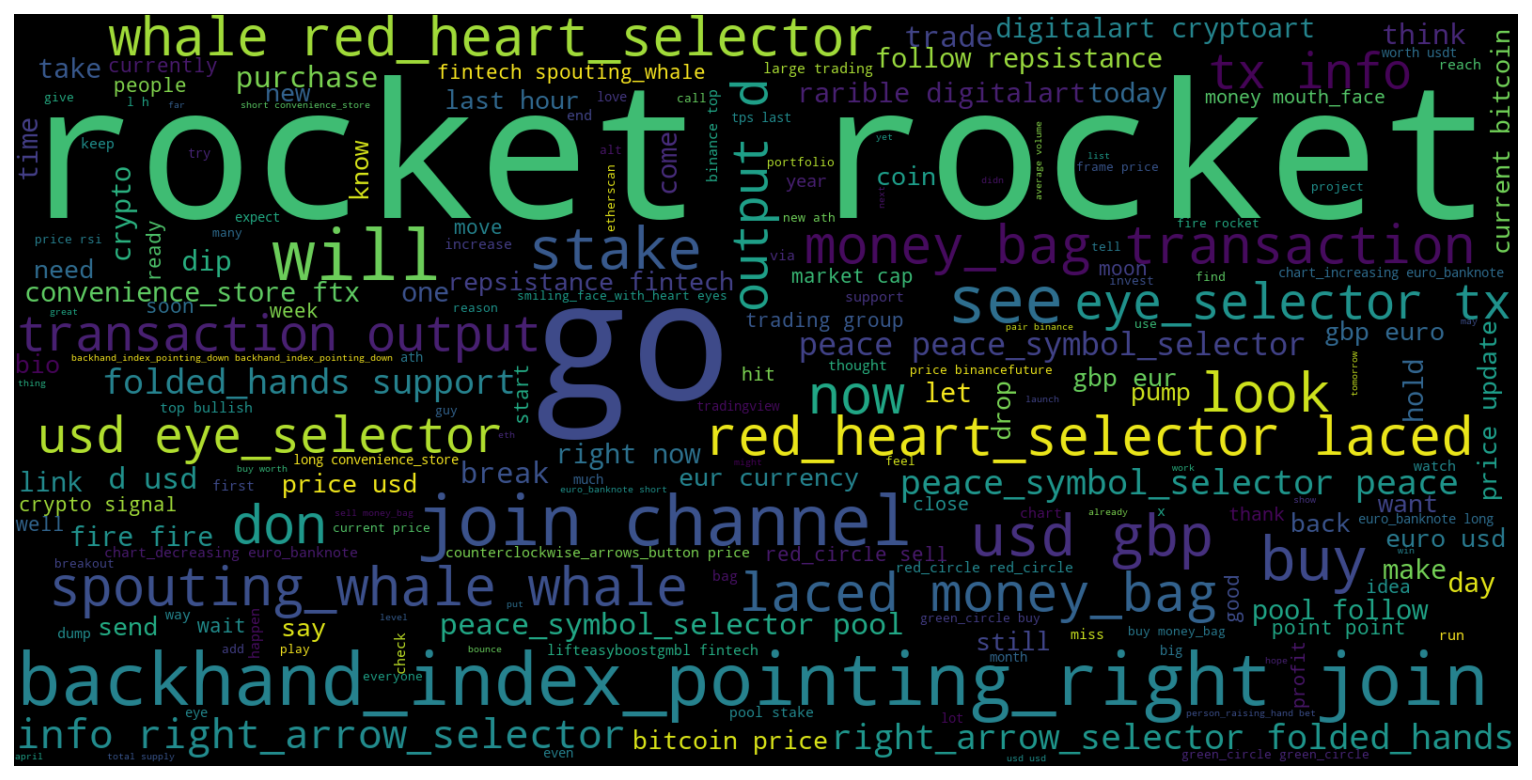

In [7]:
tweet_string = []
for t in dtf_pumps.clean_text:
    tweet_string.append(t)
tweet_string = pd.Series(tweet_string).str.cat(sep = ' ')

wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(tweet_string)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
plt.savefig("/home/vrpo/NLP/Project/plots/tokens_wordcloud.png")

# Zipf's Plot

In [5]:
count_vectorizer = CountVectorizer(); count_vectorizer.fit(dtf_pumps.clean_text); 

In [6]:
neg_doc_matrix = count_vectorizer.transform(dtf_pumps[dtf_pumps.target == 0].clean_text)
pos_doc_matrix = count_vectorizer.transform(dtf_pumps[dtf_pumps.target == 1].clean_text)
neg_tf = np.sum(neg_doc_matrix, axis = 0)
pos_tf = np.sum(pos_doc_matrix, axis = 0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg, pos], columns = count_vectorizer.get_feature_names()).transpose();

In [8]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df['words'] = count_vectorizer.get_feature_names(); 
term_freq_df.to_csv("~/NLP/Project/data/models/plots/countvectorizer_all.csv", index = False); 
term_freq_df.sort_values(by = 'total', ascending = False).iloc[:100]

,negative,positive,total,words
be,87973,82811,170784,be
the,68847,64906,133753,the
to,46351,44431,90782,to
and,34984,31349,66333,and
in,31337,30921,62258,in
...,...,...,...,...
one,3908,3758,7666,one
when,4065,3532,7597,when
gbp,3747,3789,7536,gbp
info,3211,4293,7504,info


Text(0.5, 1.0, 'Top 500 Tokens in Tweets')

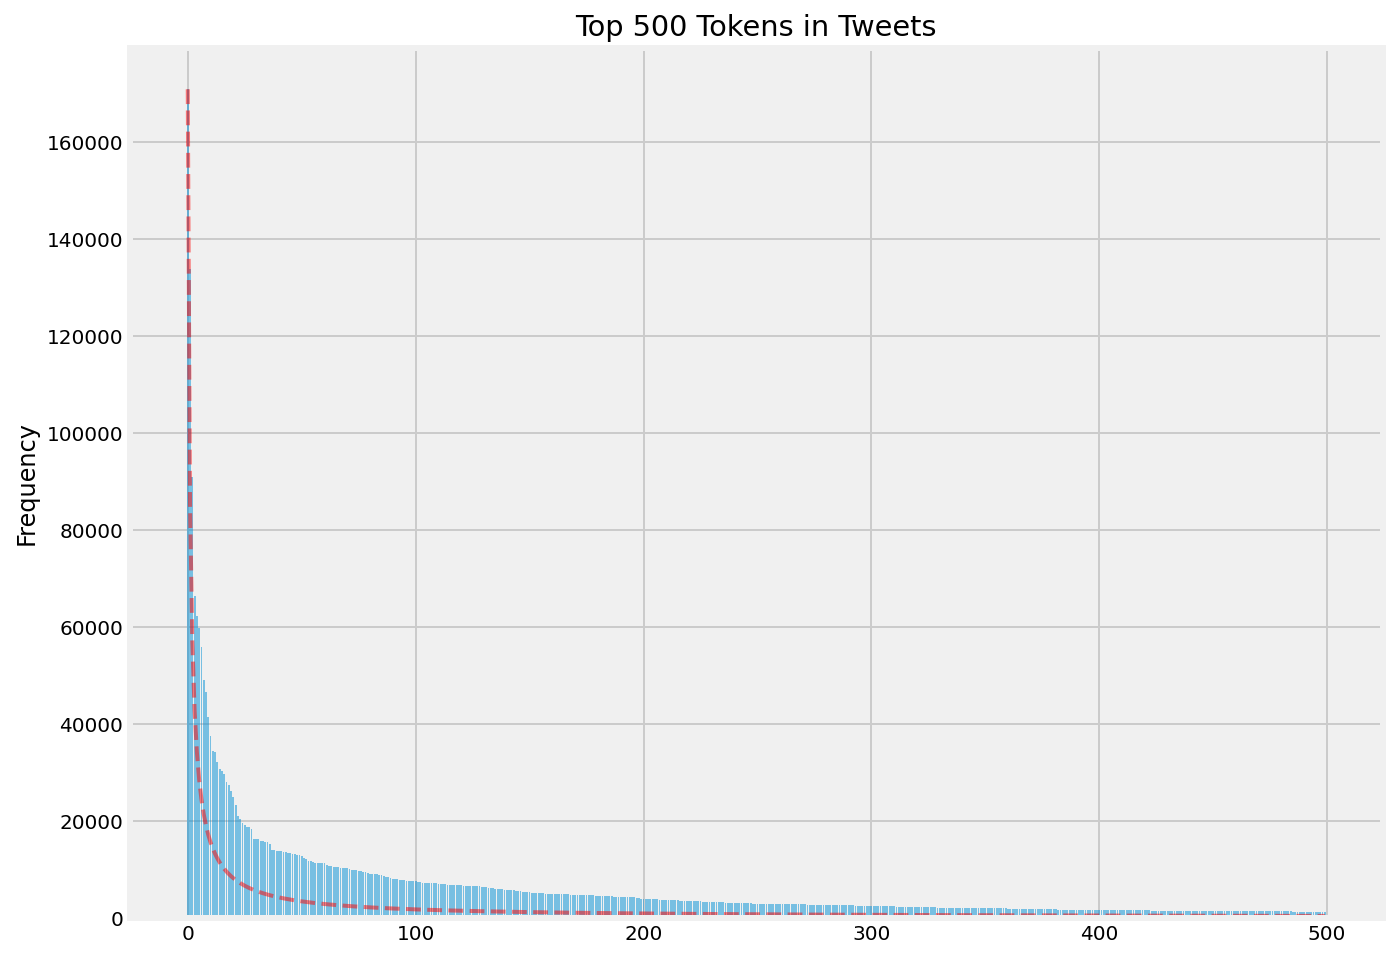

In [9]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 Tokens in Tweets')

# Bots Vs. Humans

In [10]:
count_vectorizer = CountVectorizer(stop_words = 'english', 
                                   min_df = 0.001,
                                   max_df = 0.90,
                                   ngram_range = (1, 1),
                                   analyzer = 'word'); 

## Bots

In [11]:
count_vectorizer.fit(bot_TRUE.clean_text); 

In [12]:
neg_doc_matrix = count_vectorizer.transform(bot_TRUE[bot_TRUE.target == 0].clean_text)
pos_doc_matrix = count_vectorizer.transform(bot_TRUE[bot_TRUE.target == 1].clean_text)
neg_tf = np.sum(neg_doc_matrix, axis = 0)
pos_tf = np.sum(pos_doc_matrix, axis = 0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg, pos], columns = count_vectorizer.get_feature_names()).transpose();

In [13]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df['words'] = count_vectorizer.get_feature_names(); 
term_freq_df.sort_values(by = 'total', ascending = False).iloc[:100]

,negative,positive,total,words
usd,4298,4442,8740,usd
gbp,3706,3756,7462,gbp
price,3193,3785,6978,price
current,1969,1944,3913,current
bitcoin,1862,1892,3754,bitcoin
...,...,...,...,...
social,46,50,96,social
exchange,58,37,95,exchange
day,57,38,95,day
blue,25,69,94,blue


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

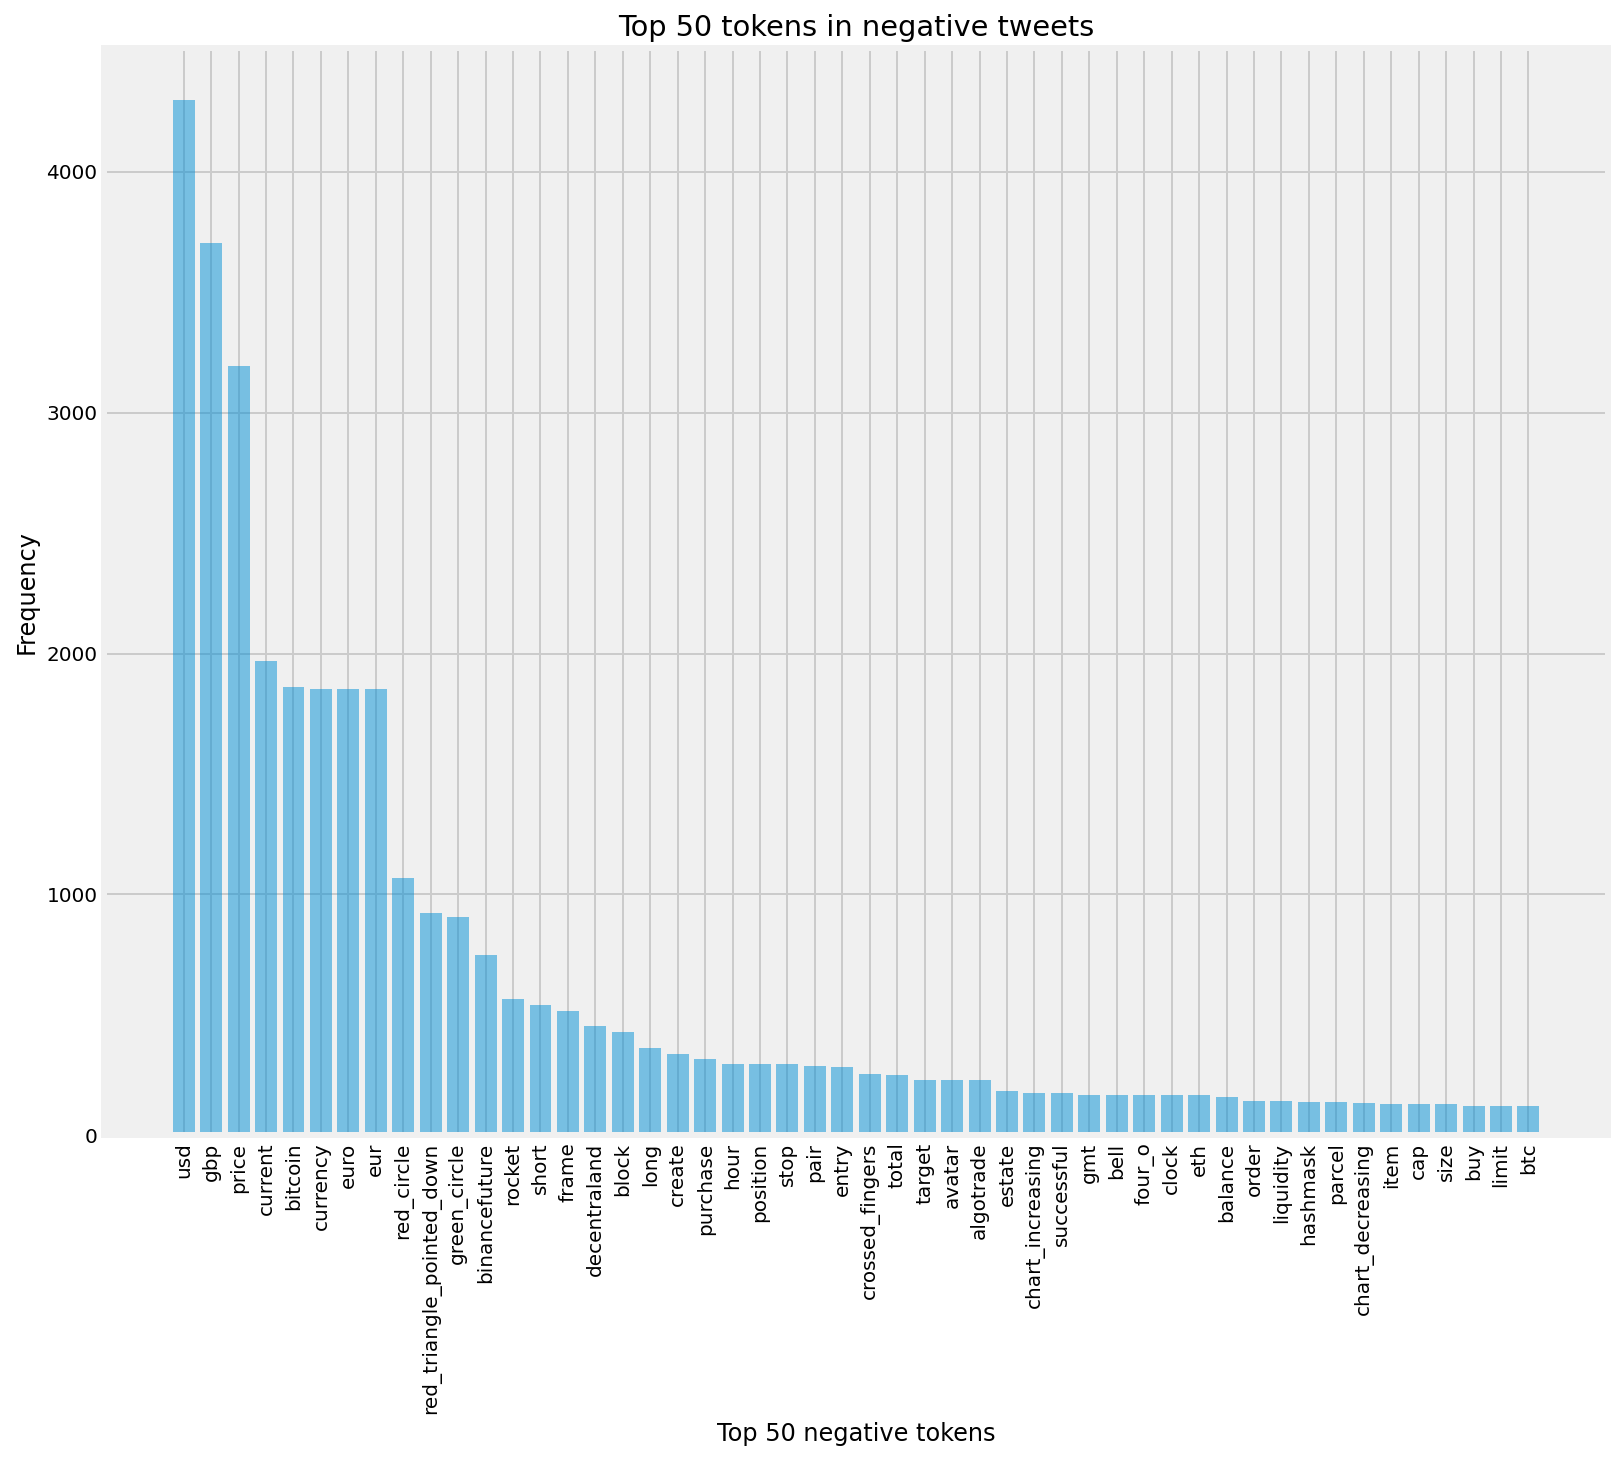

In [14]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

In [15]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')bots

SyntaxError: invalid syntax (<ipython-input-15-0f1ce1f63370>, line 7)

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

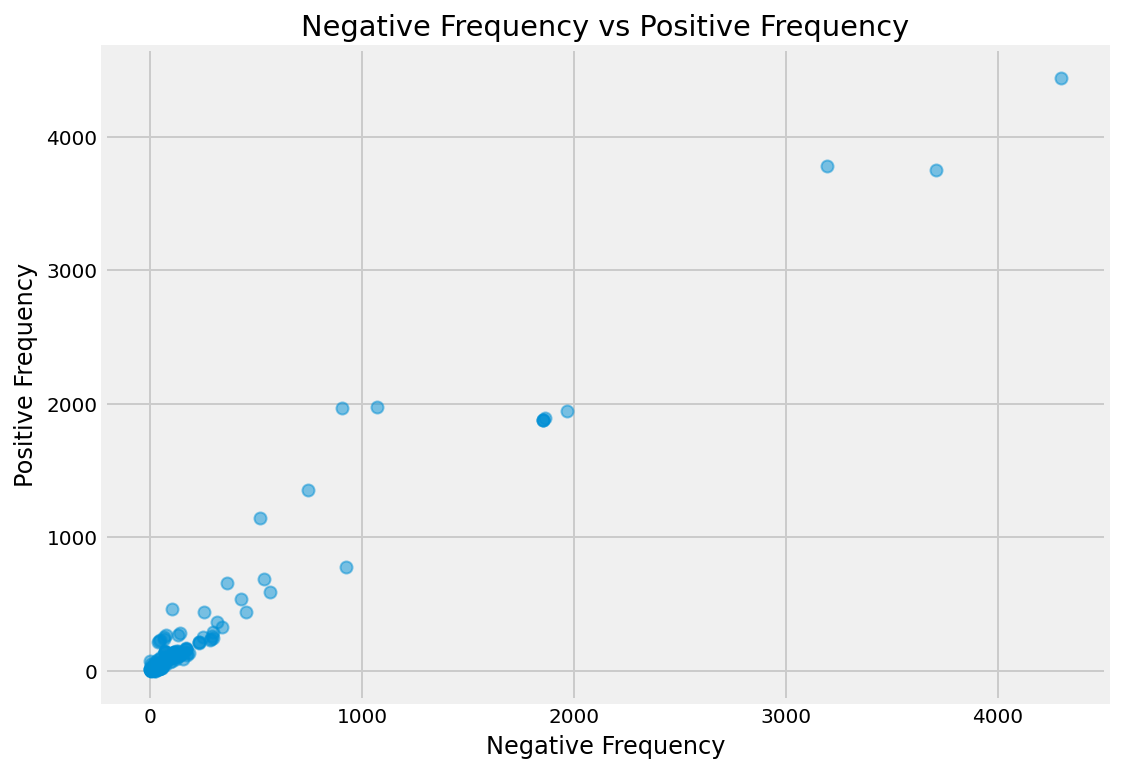

In [132]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [133]:
term_freq_df['pos_rate'] = term_freq_df['positive'] * 1./term_freq_df['total']
term_freq_df.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,words,pos_rate
casino,0,17,17,casino,1.000000
algorithm,0,75,75,algorithm,1.000000
visor,0,17,17,visor,1.000000
resistance,5,55,60,resistance,0.916667
support,4,32,36,support,0.888889
indian,2,12,14,indian,0.857143
possible,40,218,258,possible,0.844961
divergence,46,229,275,divergence,0.832727
infoalert,45,223,268,infoalert,0.832090
botsignal,106,463,569,botsignal,0.813708


In [134]:
term_freq_df['pos_freq_pct'] = term_freq_df['positive'] * 1./term_freq_df['positive'].sum()
term_freq_df.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,words,pos_rate,pos_freq_pct
usd,4298,4442,8740,usd,0.508238,0.094854
price,3193,3785,6978,price,0.542419,0.080824
gbp,3706,3756,7462,gbp,0.503350,0.080205
red_circle,1070,1978,3048,red_circle,0.648950,0.042238
green_circle,905,1972,2877,green_circle,0.685436,0.042110
current,1969,1944,3913,current,0.496806,0.041512
bitcoin,1862,1892,3754,bitcoin,0.503996,0.040401
currency,1854,1882,3736,currency,0.503747,0.040188
eur,1853,1878,3731,eur,0.503350,0.040102
euro,1853,1878,3731,euro,0.503350,0.040102


In [135]:
term_freq_df['pos_hmean'] = term_freq_df.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']]) if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)

term_freq_df.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,words,pos_rate,pos_freq_pct,pos_hmean
usd,4298,4442,8740,usd,0.508238,0.094854,0.159870
price,3193,3785,6978,price,0.542419,0.080824,0.140685
gbp,3706,3756,7462,gbp,0.503350,0.080205,0.138363
green_circle,905,1972,2877,green_circle,0.685436,0.042110,0.079345
red_circle,1070,1978,3048,red_circle,0.648950,0.042238,0.079314
current,1969,1944,3913,current,0.496806,0.041512,0.076621
bitcoin,1862,1892,3754,bitcoin,0.503996,0.040401,0.074806
currency,1854,1882,3736,currency,0.503747,0.040188,0.074437
euro,1853,1878,3731,euro,0.503350,0.040102,0.074287
eur,1853,1878,3731,eur,0.503350,0.040102,0.074287


In [136]:
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
term_freq_df['pos_rate_normcdf'] = normcdf(term_freq_df['pos_rate'])
term_freq_df['pos_freq_pct_normcdf'] = normcdf(term_freq_df['pos_freq_pct'])
term_freq_df['pos_normcdf_hmean'] = hmean([term_freq_df['pos_rate_normcdf'], term_freq_df['pos_freq_pct_normcdf']])
term_freq_df.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

,negative,positive,total,words,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
green_circle,905,1972,2877,green_circle,0.685436,0.042110,0.079345,0.870261,0.999868,0.930573
frame,517,1149,1666,frame,0.689676,0.024536,0.047385,0.876408,0.977007,0.923977
red_circle,1070,1978,3048,red_circle,0.648950,0.042238,0.079314,0.808654,0.999874,0.894155
binancefuture,747,1358,2105,binancefuture,0.645131,0.028999,0.055502,0.801303,0.992135,0.886566
botsignal,106,463,569,botsignal,0.813708,0.009887,0.019536,0.978462,0.731790,0.837337
long,364,662,1026,long,0.645224,0.014136,0.027666,0.801485,0.845606,0.822955
crossed_fingers,253,439,692,crossed_fingers,0.634393,0.009374,0.018476,0.779746,0.715679,0.746340
rank,77,270,347,rank,0.778098,0.005766,0.011446,0.962003,0.591246,0.732375
pattern,64,252,316,pattern,0.797468,0.005381,0.010690,0.971909,0.577152,0.724231
divergence,46,229,275,divergence,0.832727,0.004890,0.009723,0.984448,0.559001,0.713088


In [137]:
term_freq_df['neg_rate'] = term_freq_df['negative'] * 1./term_freq_df['total']
term_freq_df['neg_freq_pct'] = term_freq_df['negative'] * 1./term_freq_df['negative'].sum()
term_freq_df['neg_hmean'] = term_freq_df.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']]) if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0 else 0), axis=1)
                                                       
term_freq_df['neg_rate_normcdf'] = normcdf(term_freq_df['neg_rate'])
term_freq_df['neg_freq_pct_normcdf'] = normcdf(term_freq_df['neg_freq_pct'])
term_freq_df['neg_normcdf_hmean'] = hmean([term_freq_df['neg_rate_normcdf'], term_freq_df['neg_freq_pct_normcdf']])
term_freq_df.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,words,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
red_triangle_pointed_down,924,780,1704,red_triangle_pointed_down,0.457746,0.016656,0.032142,0.322155,0.895202,0.473803,0.542254,0.022951,0.044039,0.677845,0.960204,0.794689
current,1969,1944,3913,current,0.496806,0.041512,0.076621,0.425029,0.999836,0.596491,0.503194,0.048908,0.089151,0.574971,0.999976,0.730129
gbp,3706,3756,7462,gbp,0.503350,0.080205,0.138363,0.443003,1.000000,0.614001,0.496650,0.092054,0.155319,0.556997,1.000000,0.715476
euro,1853,1878,3731,euro,0.503350,0.040102,0.074287,0.443003,0.999729,0.613950,0.496650,0.046027,0.084246,0.556997,0.999931,0.715459
eur,1853,1878,3731,eur,0.503350,0.040102,0.074287,0.443003,0.999729,0.613950,0.496650,0.046027,0.084246,0.556997,0.999931,0.715459
currency,1854,1882,3736,currency,0.503747,0.040188,0.074437,0.444097,0.999737,0.615002,0.496253,0.046052,0.084282,0.555903,0.999932,0.714555
bitcoin,1862,1892,3754,bitcoin,0.503996,0.040401,0.074806,0.444782,0.999756,0.615662,0.496004,0.046251,0.084611,0.555218,0.999937,0.713990
usd,4298,4442,8740,usd,0.508238,0.094854,0.159870,0.456504,1.000000,0.626849,0.491762,0.106759,0.175432,0.543496,1.000000,0.704240
position,296,246,542,position,0.453875,0.005253,0.010386,0.312524,0.572431,0.404311,0.546125,0.007352,0.014509,0.687476,0.640841,0.663340
decentraland,453,439,892,decentraland,0.492152,0.009374,0.018398,0.412342,0.715679,0.523225,0.507848,0.011252,0.022016,0.587658,0.760774,0.663103


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

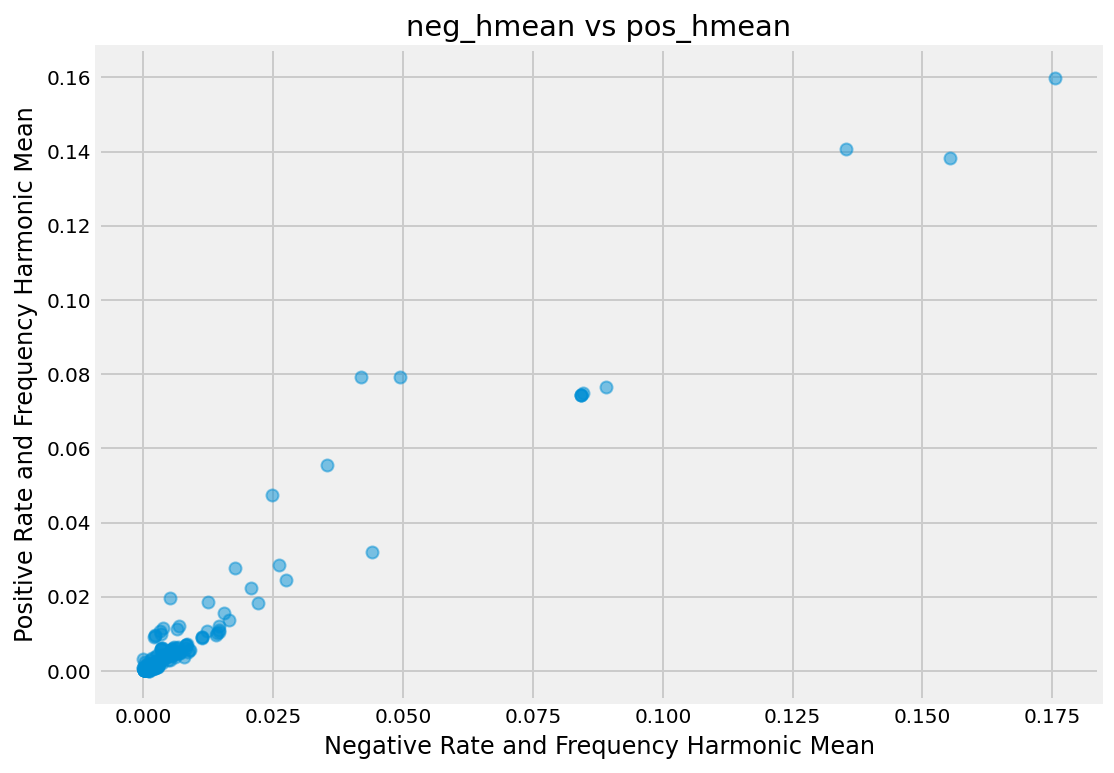

In [138]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

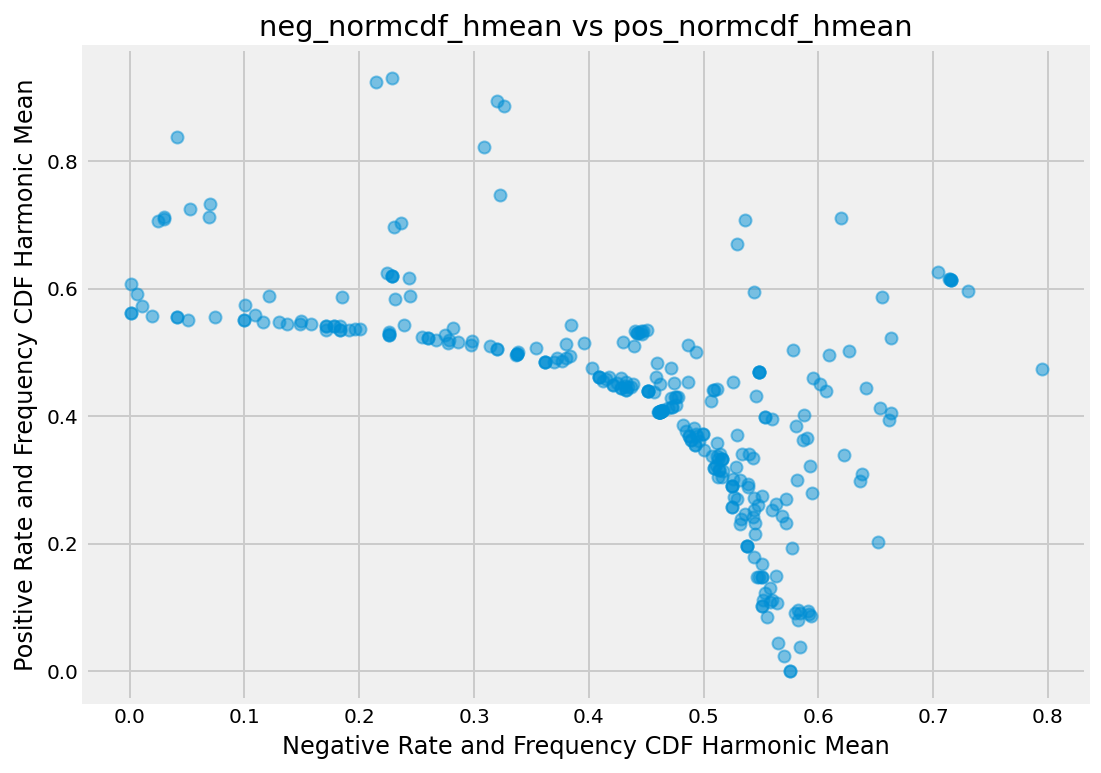

In [139]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [140]:
term_freq_df.to_csv("~/NLP/Project/data/models/plots/countvectorizer_bots.csv", index = False); 

## Humans

In [141]:
count_vectorizer.fit(bot_FALSE.clean_text); 

In [142]:
neg_doc_matrix = count_vectorizer.transform(bot_FALSE[bot_FALSE.target == 0].clean_text)
pos_doc_matrix = count_vectorizer.transform(bot_FALSE[bot_FALSE.target == 1].clean_text)
neg_tf = np.sum(neg_doc_matrix, axis = 0)
pos_tf = np.sum(pos_doc_matrix, axis = 0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg, pos], columns = count_vectorizer.get_feature_names()).transpose();

In [143]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df['words'] = count_vectorizer.get_feature_names(); 
term_freq_df.sort_values(by = 'total', ascending = False).iloc[:100]

,negative,positive,total,words
rocket,18545,17755,36300,rocket
price,17845,16440,34285,price
buy,13932,13092,27024,buy
join,9423,10009,19432,join
usd,9288,9890,19178,usd
...,...,...,...,...
say,2498,2241,4739,say
rarible,2376,2337,4713,rarible
hit,2416,2260,4676,hit
know,2386,2280,4666,know


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

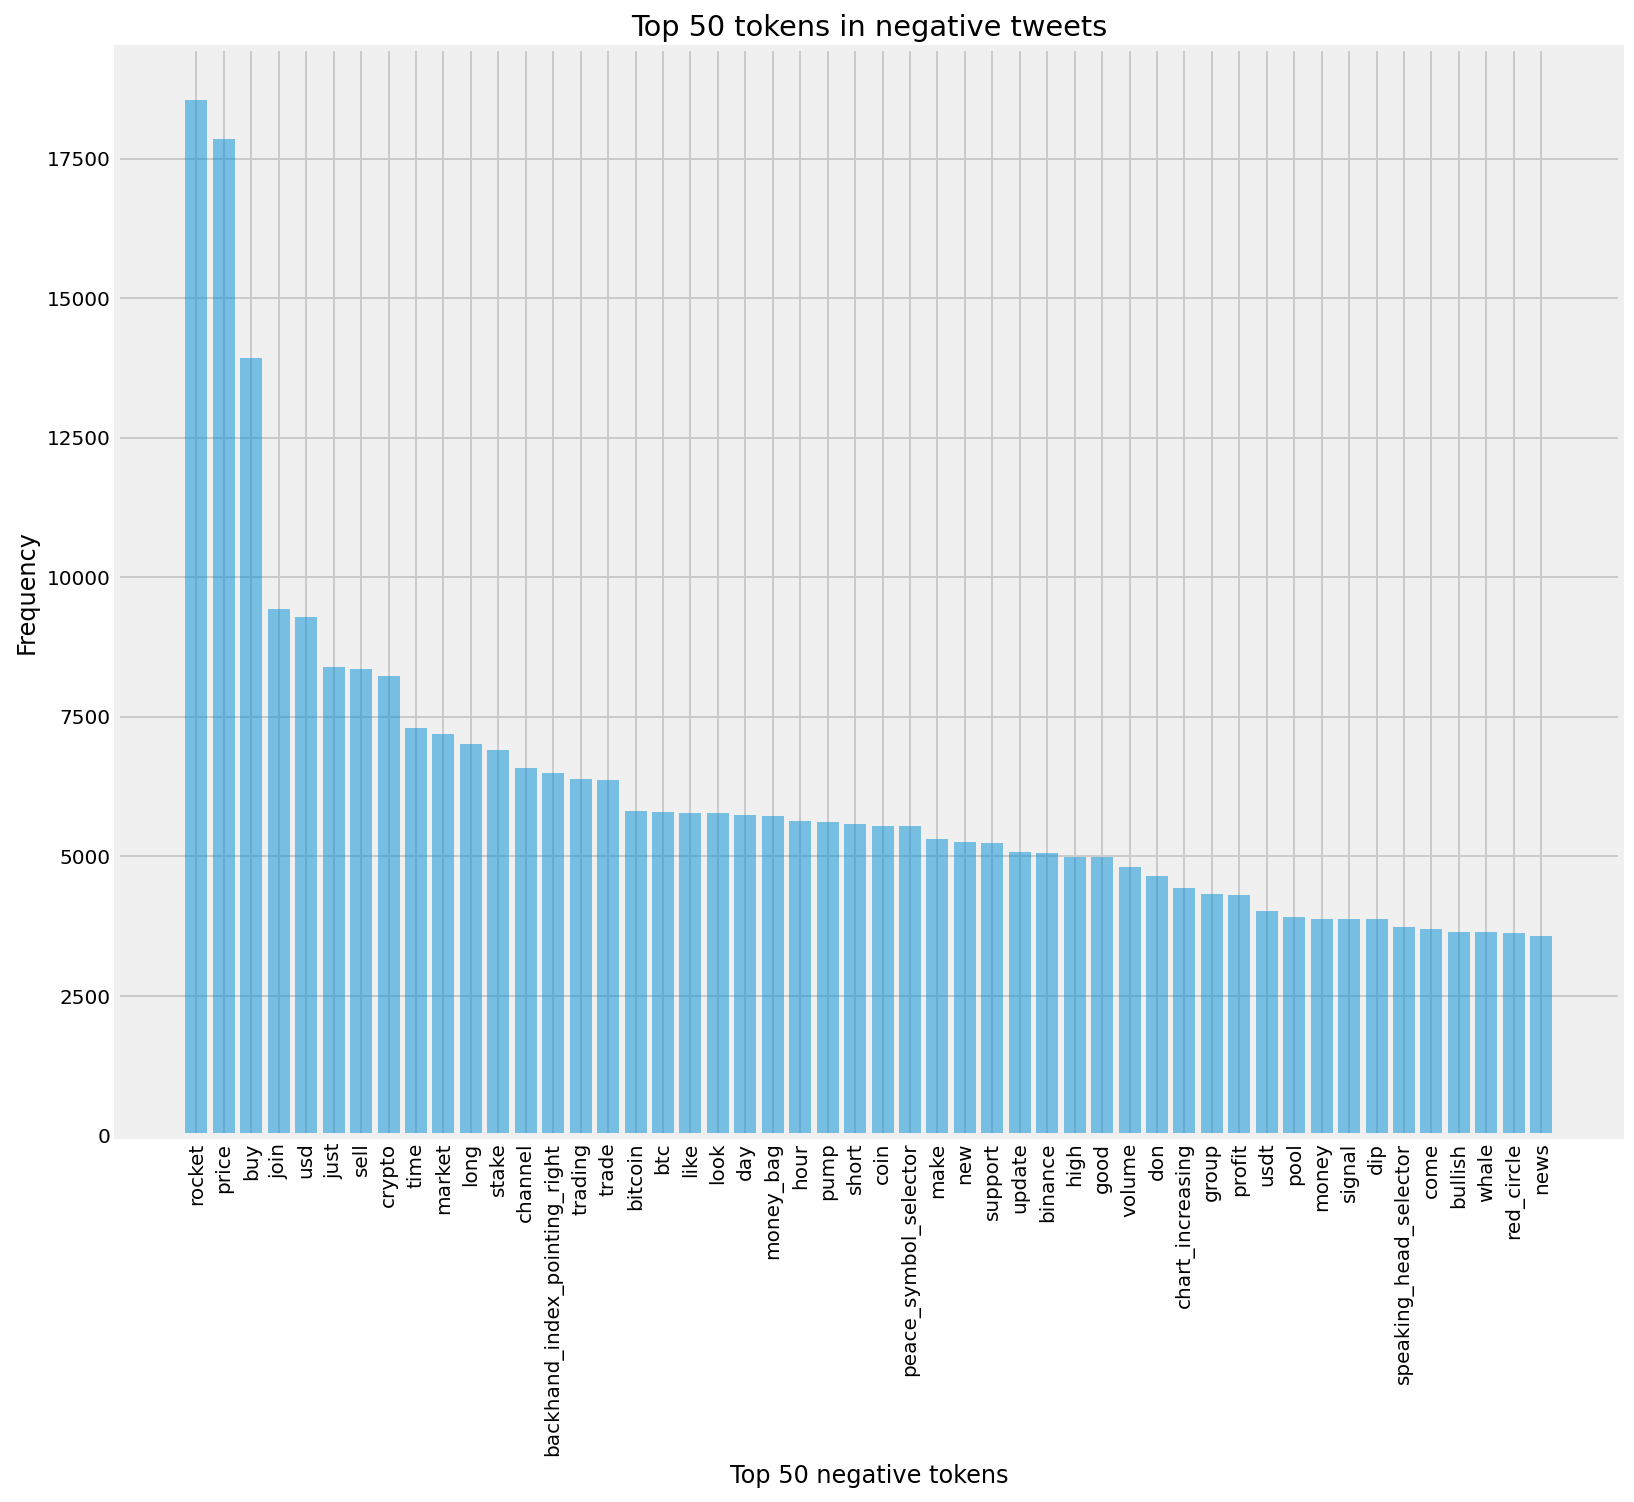

In [144]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

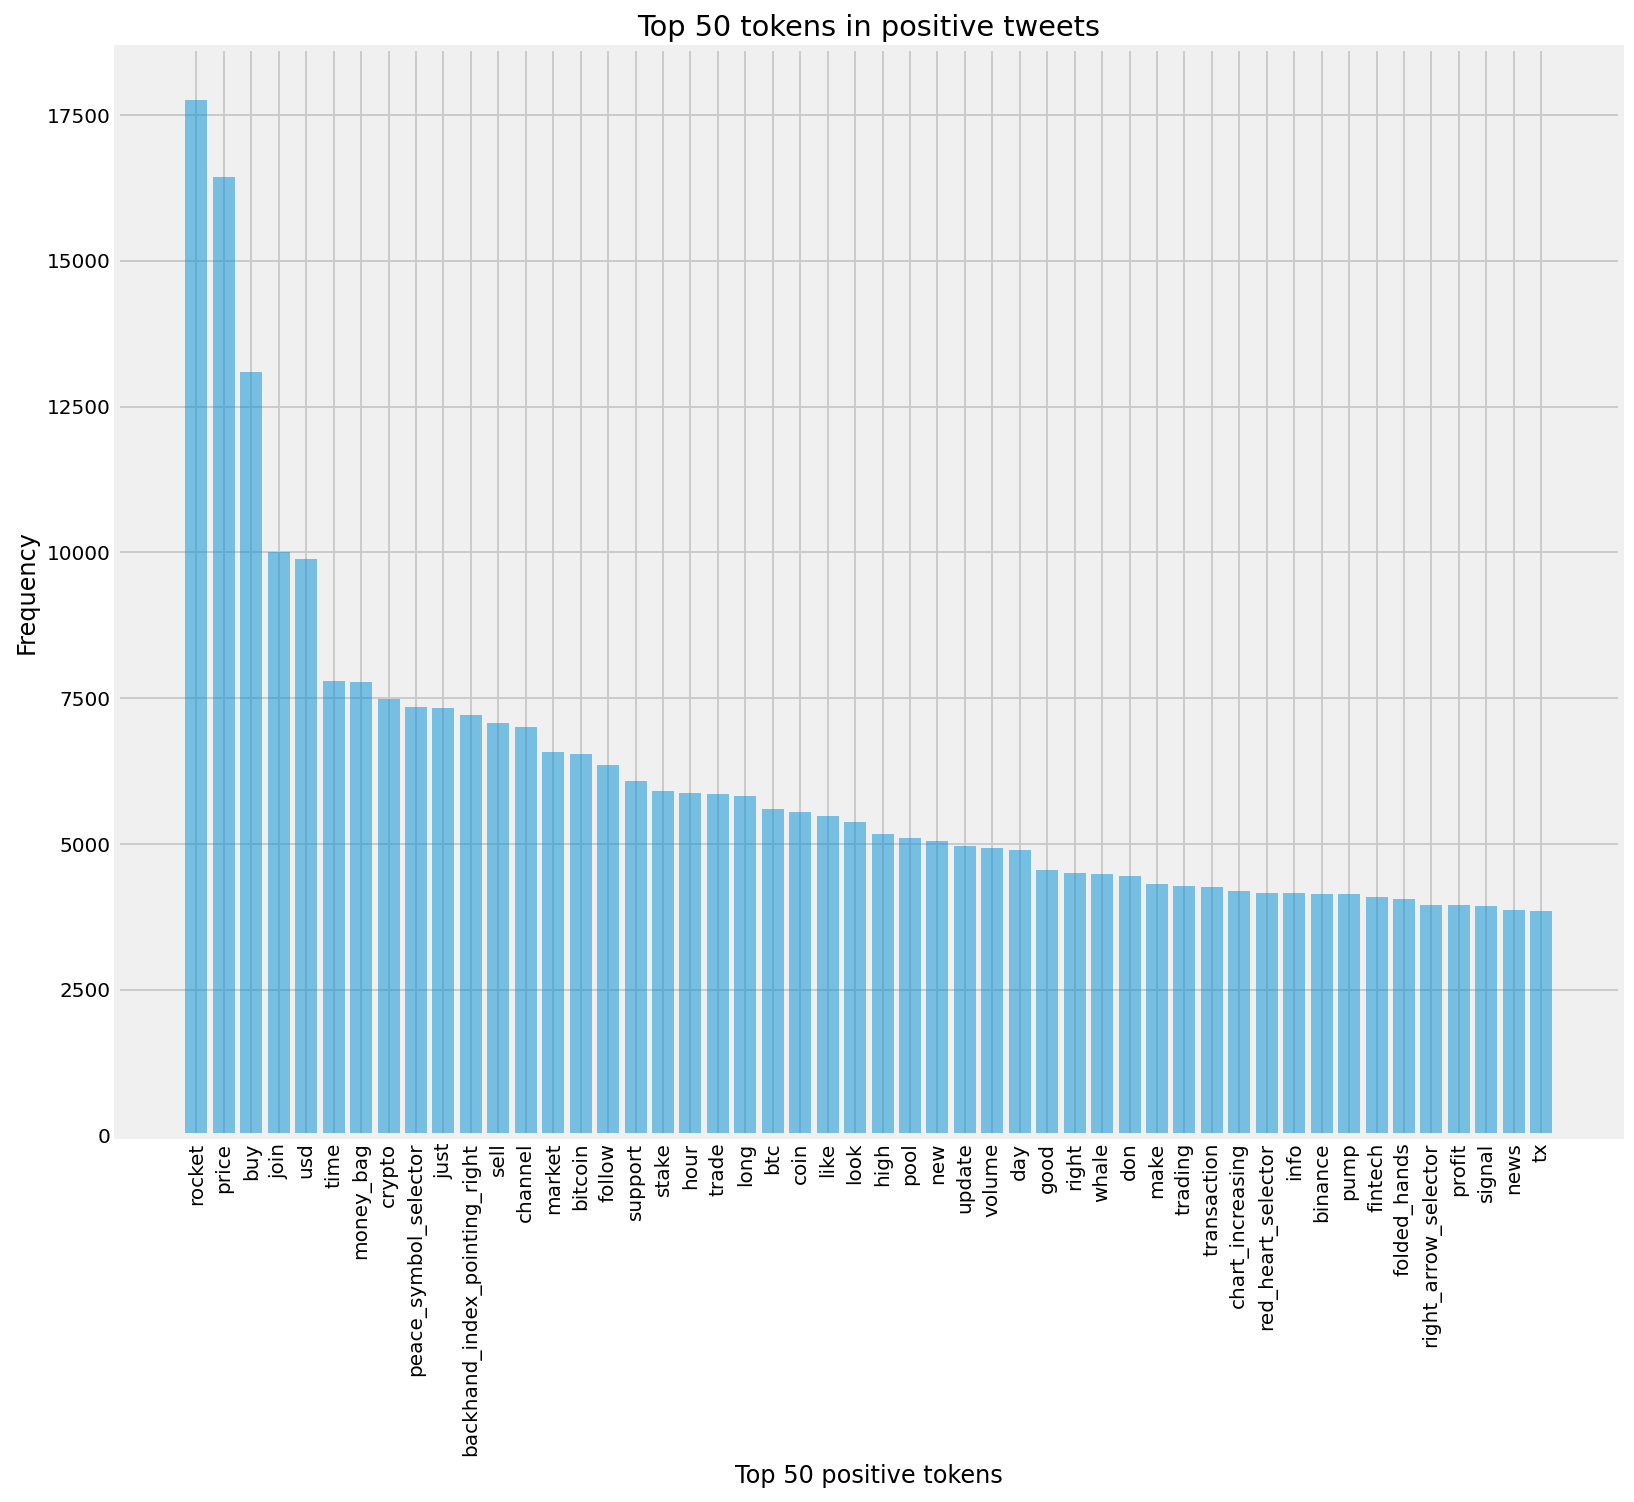

In [145]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

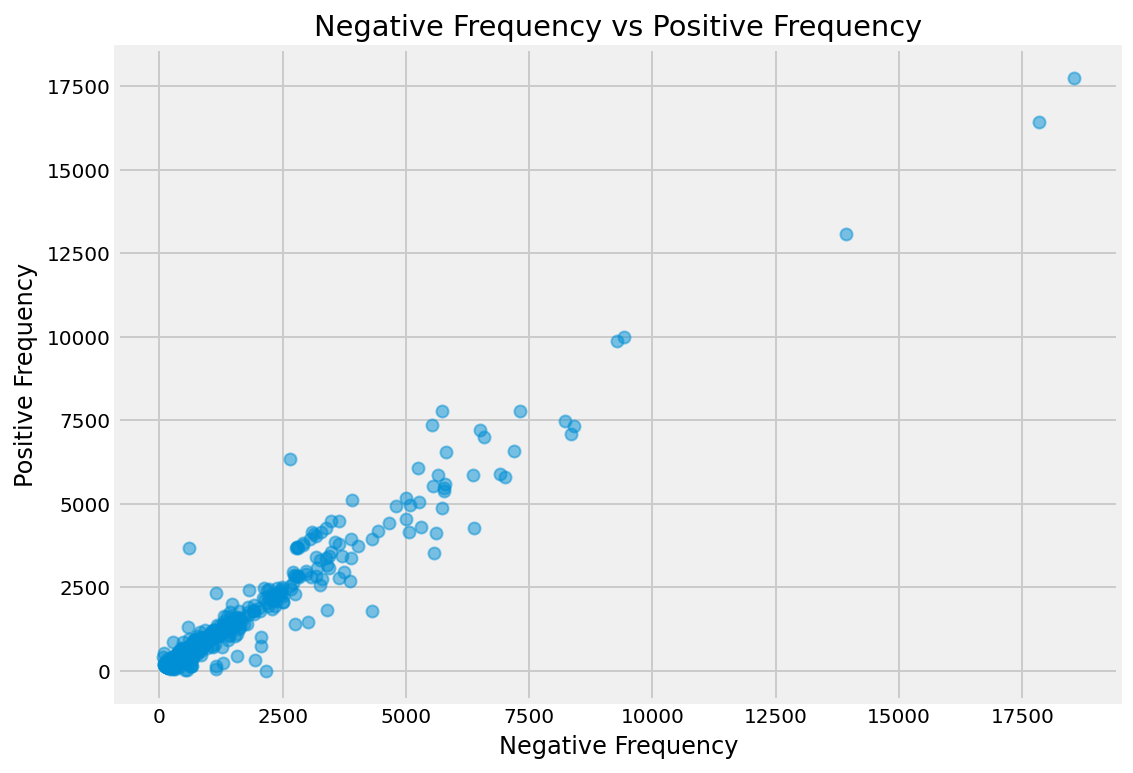

In [146]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [147]:
term_freq_df['pos_rate'] = term_freq_df['positive'] * 1./term_freq_df['total']
term_freq_df.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,words,pos_rate
repsistance,606,3674,4280,repsistance,0.858411
warning,68,408,476,warning,0.857143
skyrocket,96,552,648,skyrocket,0.851852
harmony,285,872,1157,harmony,0.753673
heavy_large_circle,150,364,514,heavy_large_circle,0.708171
follow,2647,6356,9003,follow,0.705987
uno,108,253,361,uno,0.700831
gem,574,1326,1900,gem,0.697895
launchpad,92,203,295,launchpad,0.688136
etherscan,1151,2329,3480,etherscan,0.669253


In [148]:
term_freq_df['pos_freq_pct'] = term_freq_df['positive'] * 1./term_freq_df['positive'].sum()
term_freq_df.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,words,pos_rate,pos_freq_pct
rocket,18545,17755,36300,rocket,0.489118,0.018489
price,17845,16440,34285,price,0.479510,0.017119
buy,13932,13092,27024,buy,0.484458,0.013633
join,9423,10009,19432,join,0.515078,0.010423
usd,9288,9890,19178,usd,0.515695,0.010299
time,7305,7789,15094,time,0.516033,0.008111
money_bag,5725,7775,13500,money_bag,0.575926,0.008096
crypto,8229,7482,15711,crypto,0.476227,0.007791
peace_symbol_selector,5537,7355,12892,peace_symbol_selector,0.570509,0.007659
just,8400,7340,15740,just,0.466328,0.007643


In [149]:
term_freq_df['pos_hmean'] = term_freq_df.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']]) if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)

term_freq_df.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,words,pos_rate,pos_freq_pct,pos_hmean
rocket,18545,17755,36300,rocket,0.489118,0.018489,0.035630
price,17845,16440,34285,price,0.479510,0.017119,0.033058
buy,13932,13092,27024,buy,0.484458,0.013633,0.026520
join,9423,10009,19432,join,0.515078,0.010423,0.020432
usd,9288,9890,19178,usd,0.515695,0.010299,0.020194
time,7305,7789,15094,time,0.516033,0.008111,0.015971
money_bag,5725,7775,13500,money_bag,0.575926,0.008096,0.015968
crypto,8229,7482,15711,crypto,0.476227,0.007791,0.015331
peace_symbol_selector,5537,7355,12892,peace_symbol_selector,0.570509,0.007659,0.015115
just,8400,7340,15740,just,0.466328,0.007643,0.015040


In [150]:
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
term_freq_df['pos_rate_normcdf'] = normcdf(term_freq_df['pos_rate'])
term_freq_df['pos_freq_pct_normcdf'] = normcdf(term_freq_df['pos_freq_pct'])
term_freq_df['pos_normcdf_hmean'] = hmean([term_freq_df['pos_rate_normcdf'], term_freq_df['pos_freq_pct_normcdf']])
term_freq_df.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

,negative,positive,total,words,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
follow,2647,6356,9003,follow,0.705987,0.006619,0.013114,0.998955,0.999949,0.999452
repsistance,606,3674,4280,repsistance,0.858411,0.003826,0.007618,1.000000,0.977499,0.988622
money_bag,5725,7775,13500,money_bag,0.575926,0.008096,0.015968,0.887669,0.999999,0.940492
peace_symbol_selector,5537,7355,12892,peace_symbol_selector,0.570509,0.007659,0.015115,0.872155,0.999998,0.931711
info,3098,4152,7250,info,0.572690,0.004324,0.008582,0.878571,0.990356,0.931120
pool,3908,5105,9013,pool,0.566404,0.005316,0.010533,0.859448,0.998687,0.923850
peace,2794,3716,6510,peace,0.570814,0.003870,0.007687,0.873067,0.979029,0.923017
tx,2907,3843,6750,tx,0.569333,0.004002,0.007948,0.868600,0.983130,0.922323
eye_selector,2791,3701,6492,eye_selector,0.570086,0.003854,0.007656,0.870885,0.978493,0.921558
laced,2768,3674,6442,laced,0.570320,0.003826,0.007601,0.871587,0.977499,0.921510


In [151]:
term_freq_df['neg_rate'] = term_freq_df['negative'] * 1./term_freq_df['total']
term_freq_df['neg_freq_pct'] = term_freq_df['negative'] * 1./term_freq_df['negative'].sum()
term_freq_df['neg_hmean'] = term_freq_df.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']]) if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0 else 0), axis=1)
                                                       
term_freq_df['neg_rate_normcdf'] = normcdf(term_freq_df['neg_rate'])
term_freq_df['neg_freq_pct_normcdf'] = normcdf(term_freq_df['neg_freq_pct'])
term_freq_df['neg_normcdf_hmean'] = hmean([term_freq_df['neg_rate_normcdf'], term_freq_df['neg_freq_pct_normcdf']])
term_freq_df.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,words,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
group,4320,1789,6109,group,0.292847,0.001863,0.003702,2.253729e-03,0.752545,4.494000e-03,0.707153,0.004371,0.008688,0.997746,0.991601,0.994664
drop,3399,1827,5226,drop,0.349598,0.001902,0.003784,2.130911e-02,0.760891,4.145718e-02,0.650402,0.003439,0.006842,0.978691,0.960654,0.969588
short,5573,3521,9094,short,0.387178,0.003666,0.007264,6.822033e-02,0.971108,1.274849e-01,0.612822,0.005639,0.011175,0.931780,0.999427,0.964418
discord,3005,1475,4480,discord,0.329241,0.001536,0.003058,1.019742e-02,0.678061,2.009266e-02,0.670759,0.003040,0.006053,0.989803,0.931576,0.959807
trading,6378,4288,10666,trading,0.402025,0.004465,0.008832,1.008842e-01,0.992560,1.831527e-01,0.597975,0.006453,0.012769,0.899116,0.999929,0.946847
large,2751,1410,4161,large,0.338861,0.001468,0.002924,1.458353e-02,0.661548,2.853796e-02,0.661139,0.002783,0.005544,0.985416,0.905429,0.943731
dip,3874,2694,6568,dip,0.410171,0.002805,0.005573,1.230520e-01,0.906127,2.166790e-01,0.589829,0.003920,0.007788,0.876948,0.981450,0.926261
pump,5609,4143,9752,pump,0.424836,0.004314,0.008542,1.711034e-01,0.990191,2.917865e-01,0.575164,0.005675,0.011240,0.828897,0.999475,0.906229
lifteasyboostgmbl,2162,0,2162,lifteasyboostgmbl,0.000000,0.000000,0.000000,9.986666e-13,0.283570,1.997333e-12,1.000000,0.002188,0.004365,1.000000,0.818182,0.900000
member,2062,749,2811,member,0.266453,0.000780,0.001555,6.447557e-04,0.481286,1.287786e-03,0.733547,0.002086,0.004161,0.999355,0.799478,0.888312


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

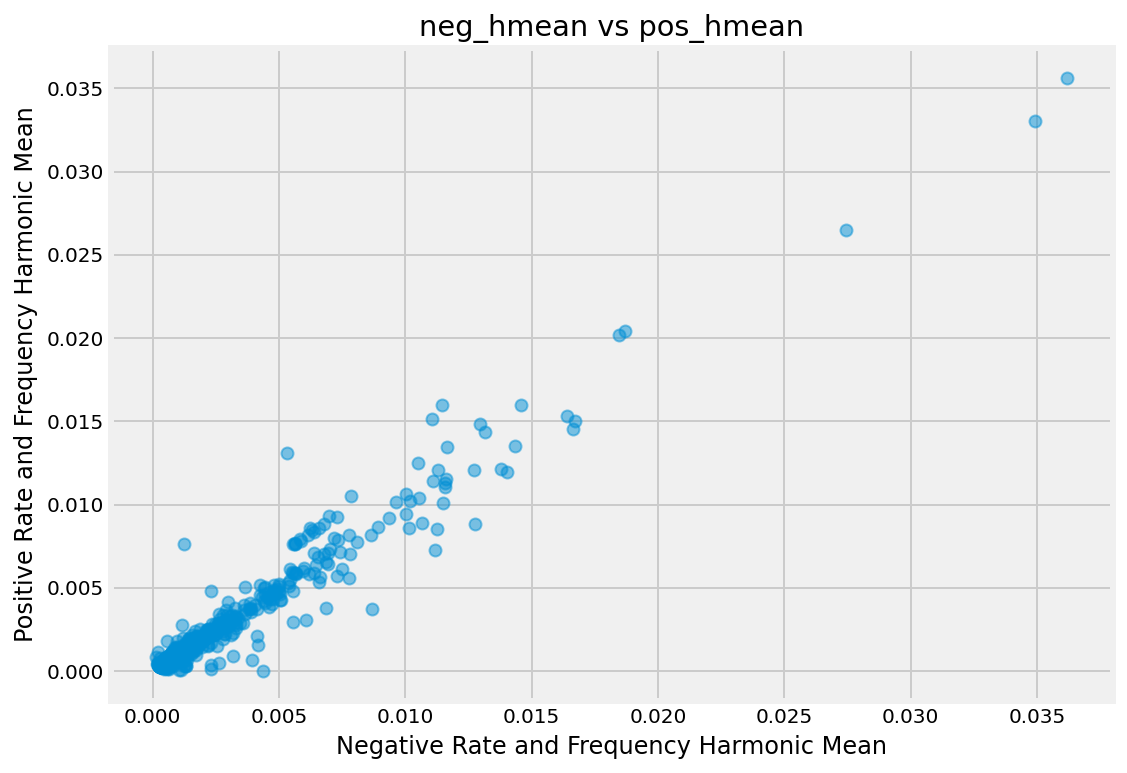

In [152]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

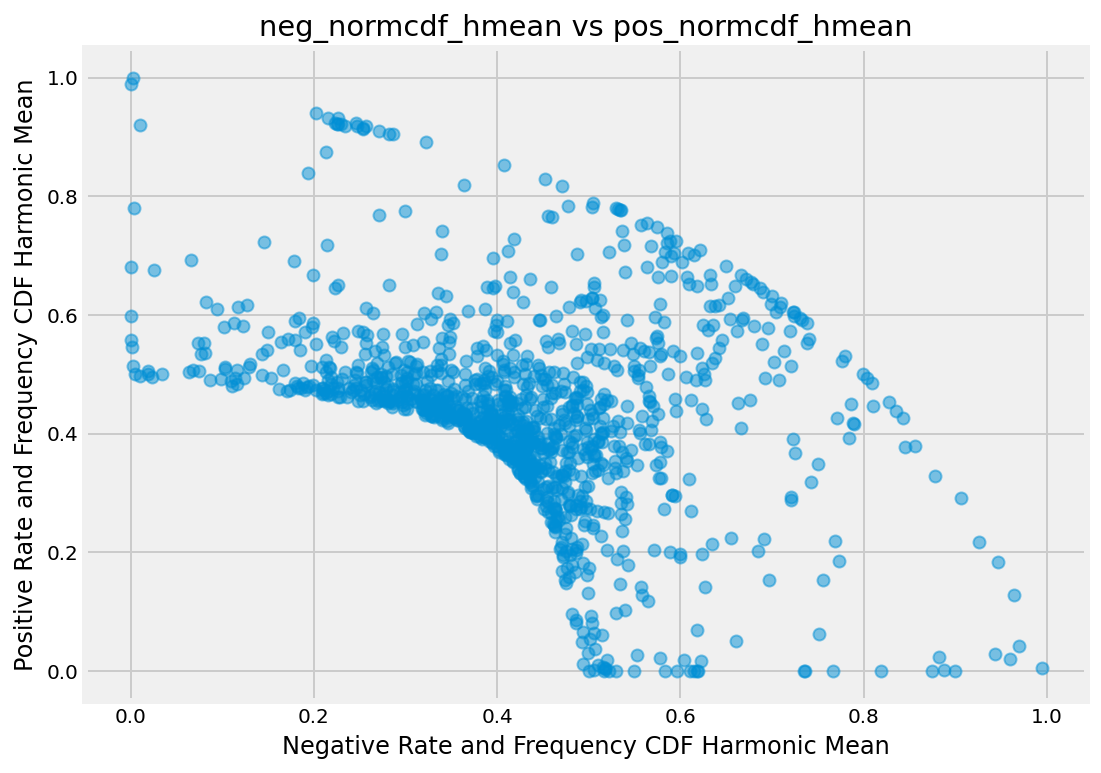

In [153]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [154]:
term_freq_df.to_csv("~/NLP/Project/data/models/plots/countvectorizer_humans.csv", index = False); 